**1. Подберите скорость обучения (alpha) и количество итераций для градиентного спуска.**

Не нашел в прикрепленных к уроку  файлах ноутбука с реализацией градиентного спуска, который вы показывали на вебинаре, поэтому за основу взял реализацию из методички

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])

In [29]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

w = np.zeros(2)

In [30]:
# функция для расчета MSE
def mserror(X, w, y):
    y_pred = X.T.dot(w)
    return (sum((y_pred - y)**2)) / len(y)

In [31]:
def gradient_descent(X, y, w, alpha, max_iter, eps):
  # список векторов весов после каждой итерации
  w_list = [w.copy()]
  # список значений ошибок после каждой итерации
  errors = []
  weight_dist = np.inf
  iter_num = 0
  # ход градиентного спуска
  while weight_dist > eps and iter_num < max_iter:
      new_w = w - 2 * alpha * np.dot(X, (np.dot(X.T, w) - y)) / y.shape[0]
      weight_dist = np.linalg.norm(new_w - w, ord=2)
      
      w_list.append(new_w.copy())
      errors.append(mserror(X, new_w, y))
      
      iter_num += 1
      w = new_w

      if iter_num % 200 == 0:
        print(mserror(X, new_w, y))

  w_list = np.array(w_list)

  return w_list, iter_num

**1. Возьмем alpha = 0.001, количество итераций = 2000**

In [32]:
w_list, iter_num = gradient_descent(X, y, w, alpha=0.001, max_iter=2000, eps=1e-6)
gradient_descent(X, y, w, alpha=0.001, max_iter=2000, eps=1e-6)

763.280371960342
519.0863041669991
358.0243355918612
251.78858131508304
181.71595280858128
135.4963603631069
105.01012384883771
84.9015385578616
71.63800561193099
62.889438586346145
763.280371960342
519.0863041669991
358.0243355918612
251.78858131508304
181.71595280858128
135.4963603631069
105.01012384883771
84.9015385578616
71.63800561193099
62.889438586346145


(array([[ 0.        ,  0.        ],
        [ 0.1148    ,  0.3598    ],
        [ 0.22749944,  0.70849688],
        ...,
        [41.60514726,  4.94978207],
        [41.6109981 ,  4.94870167],
        [41.61684285,  4.94762239]]), 2000)

***при таком шаге мы провели все 2000 итераций, MSE на 2000-й итерации составил 62.89***

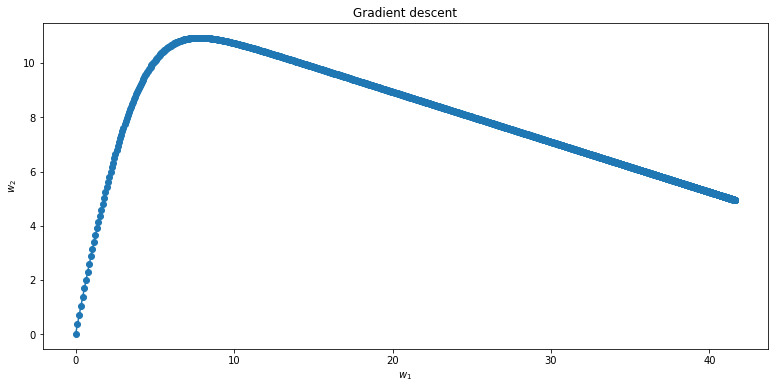

In [33]:
# Визуализируем изменение весов
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

**2. Возьмем alpha = 0.01, количество итераций = 2000**

In [11]:
w_list, iter_num = gradient_descent(X, y, w, alpha=0.01, max_iter=2000, eps=1e-6)
gradient_descent(X, y, w, alpha=0.01, max_iter=2000, eps=1e-6)

62.560247029906215
46.19157577007843
45.94138350354035
45.93755935866983
45.93750090728685
45.937500013867734
62.560247029906215
46.19157577007843
45.94138350354035
45.93755935866983
45.93750090728685
45.937500013867734


(array([[ 0.        ,  0.        ],
        [ 1.148     ,  3.598     ],
        [ 2.085944  ,  6.085688  ],
        ...,
        [47.23204762,  3.91073187],
        [47.23204861,  3.91073169],
        [47.23204959,  3.91073151]]), 1252)

Видно, что при таком шаге мы достигли сходимости с заданным eps на 1252 шаге. MSE составил 45.94. Благодаря увеличению шага, сходимость была достигнута быстрее и с лучшим результатом по MSE, т.к. мы двигались быстрее и смогли дойти до более оптимальных значений весов.

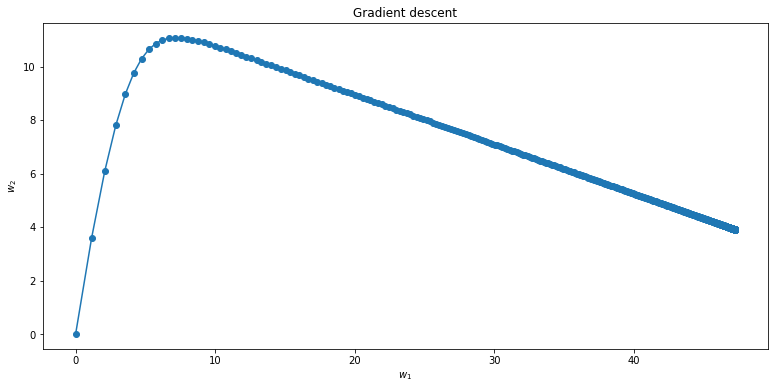

In [12]:
# Визуализируем изменение весов
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

**3. Возьмем alpha = 0.05, количество итераций = 1000**

In [13]:
w_list, iter_num = gradient_descent(X, y, w, alpha=0.05, max_iter=1000, eps=1e-6)
gradient_descent(X, y, w, alpha=0.05, max_iter=1000, eps=1e-6)

45.93750057781786
45.93750057781786


(array([[ 0.        ,  0.        ],
        [ 5.74      , 17.99      ],
        [ 6.2286    ,  8.2222    ],
        [ 9.207968  , 12.588352  ],
        [10.75419968,  9.8052864 ],
        [12.86940525, 10.68347634],
        [14.54476088,  9.72955552],
        [16.30060035,  9.73276663],
        [17.88002099,  9.27477126],
        [19.42057837,  9.07479976],
        [20.85907259,  8.76624173],
        [22.23394248,  8.53416993],
        [23.53166405,  8.28345679],
        [24.76479888,  8.06137722],
        [25.93236092,  7.84291877],
        [27.03996594,  7.63984353],
        [28.08961003,  7.44528083],
        [29.08487601,  7.26187221],
        [30.02830164,  7.08747102],
        [30.92272901,  6.9224049 ],
        [31.77063083,  6.7657842 ],
        [32.57446386,  6.61737525],
        [33.33649991,  6.47664678],
        [34.05892175,  6.3432525 ],
        [34.74378393,  6.21678419],
        [35.39304164,  6.09689545],
        [36.00854466,  5.98323727],
        [36.59204851,  5.875

Достигли сходимости при заданном уровне eps всего за 276 итераций, результат по MSE аналогичен прошлому - 45.94. 

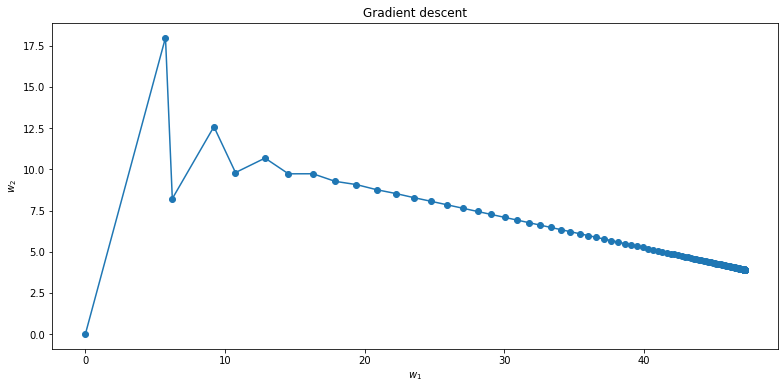

In [14]:
# Визуализируем изменение весов
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

**2 (опция). В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:**

In [15]:
n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.0001)

In [16]:
#первоначальный код с циклом
for i in range(1000):
  y_pred = np.dot(W, X)
  err = mserror(X, W, y)
  for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
  #W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
  if i % 100 == 0:
    print(i, W, err)

0 [1.01102 0.534  ] 3173.15
100 [2.02168794 3.452835  ] 2207.6942101483005
200 [2.88306663 5.58962851] 1670.7027004086372
300 [3.63289519 7.14848061] 1368.0832412796258
400 [4.29908617 8.28027926] 1193.7493344933293
500 [4.90228732 9.09657298] 1089.714750358689
600 [5.45777535 9.67982684] 1024.2828984889416
700 [ 5.97685612 10.0910047 ] 980.1260644155933
800 [ 6.46789973 10.37517467] 947.770026039189
900 [ 6.93710574 10.56565326] 922.0330206910178


Ошибка в предложенном коде с избавленем от цикла заключается в том, что мы из вектора весов должны вычитать вектор градиента, умноженный на коэффициент скорости обучения (чтобы пройти в направлении антиградиента). А в результате выполнения предложенного кода из вектора весов вычитается константа. Соответственно, необходимо реализовать код, как указано ниже:

In [17]:
n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])
W, alpha

for i in range(1000):
  y_pred = np.dot(W, X)
  err = mserror(X, W, y)
  '''for ii in range(W.shape[0]):
  W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
  W -= (alpha * (1/n * 2 * np.dot(X, y_pred - y)))
  if i % 100 == 0:
    print(i, W, err)

0 [1.01102 0.534  ] 3173.15
100 [2.02168794 3.452835  ] 2207.6942101483005
200 [2.88306663 5.58962851] 1670.7027004086372
300 [3.63289519 7.14848061] 1368.0832412796258
400 [4.29908617 8.28027926] 1193.7493344933293
500 [4.90228732 9.09657298] 1089.714750358689
600 [5.45777535 9.67982684] 1024.2828984889416
700 [ 5.97685612 10.0910047 ] 980.1260644155933
800 [ 6.46789973 10.37517467] 947.770026039189
900 [ 6.93710574 10.56565326] 922.0330206910178


Результат получается аналогичный изначальному коду с циклом по итерациям.